# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
Визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
# import mpl_toolkits.basemap as bm

from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 10)

# Plotting config
%pylab inline


Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [2]:
N = 59


In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора\
    кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, \
    average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm


Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
# Задание 1
from sklearn.base import BaseEstimator, ClusterMixin


class Clustering(BaseEstimator, ClusterMixin):
    """
    Алгоритм DBSCAN
    """

    def __init__(self, eps=1, min_pts=5):
        """
        Инициализация метода
        :eps - размер окрестности
        :min_pts - минимальное количество объектов в окрестности
        """

        self.eps = eps
        self.min_pts = min_pts

    @staticmethod
    def __euclidean_distance(X, Y):
        x_dist = (X ** 2).sum(axis=1)
        y_dist = (Y ** 2).sum(axis=1)
        xy_dist = X.dot(Y.T)
        dist = - 2 * xy_dist + y_dist + x_dist.reshape(-1, 1)
        dist[dist < 0] = 0
        return np.sqrt(dist)

    def __get_neighbours(self, X, i):
        return np.arange(self.x_len)[self.dists[i, :] < self.eps]

    def __expand_claster(self, X, i, nbr, C, used):
        if self.labels[i] == 0:
            self.labels[i] = C

        for j in nbr:
            if not used[j]:
                used[j] = True
                nbr1 = self.__get_neighbours(X, j)
                if nbr1.shape[0] >= self.min_pts + 1:
                    self.__expand_claster(X, j, nbr1, C, used)
            if self.labels[j] == 0:
                self.labels[j] = C

    def fit(self, x, y=None):
        """
        Процедура обучения DBSCAN
        """

        X = x.astype(float)
        self.x_len = len(X)

        # Массив меток
        self.labels = np.zeros(self.x_len, dtype=int)

        # Массив, в котором отмечаются "использованные" объекты
        used = np.zeros(self.x_len, dtype=bool)

        # Массив расстояний между объектами для быстрого поиска "соседей"
        self.dists = self.__euclidean_distance(X, X)

        C = 0  # Номер текущего кластера
        for i in xrange(self.x_len):
            if used[i]:
                continue
            used[i] = True
            nbr = self.__get_neighbours(X, i)
            if nbr.shape[0] < self.min_pts + 1:
                self.labels[i] = -1
            else:
                C += 1
                self.__expand_claster(X, i, nbr, C, used)

        return self

    def predict(self, x):
        """
        Процедура предсказания кластера

        Возвращает метку кластера для каждого объекта
        """

        return self.labels

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)


Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

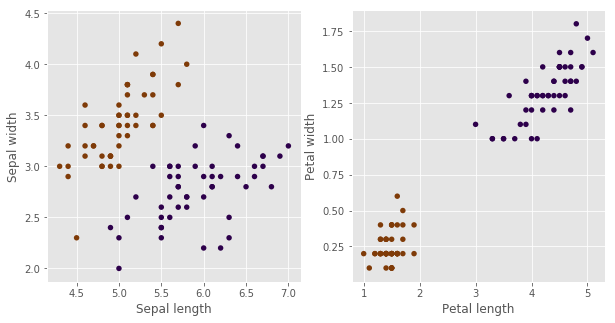

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()


Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
pred_iris = Clustering().fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt\
    .adjusted_rand_score(y_iris, pred_iris)


Adjusted Rand index for iris is: 1.00


In [7]:
# sklearn
%timeit DBSCAN(eps=1, min_samples=5).fit_predict(x_iris)


100 loops, best of 3: 2.11 ms per loop


In [8]:
# Clustering
%timeit Clustering(eps=1, min_pts=5).fit_predict(x_iris)


100 loops, best of 3: 4.11 ms per loop


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Silhouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [9]:
# Задание 2


def euclidean_distance(X, Y):
        x_dist = (X ** 2).sum(axis=1)
        y_dist = (Y ** 2).sum(axis=1)
        xy_dist = X.dot(Y.T)
        dist = - 2 * xy_dist + y_dist + x_dist.reshape(-1, 1)
        dist[dist < 0] = 0
        return np.sqrt(dist)


def quality(X, y):
    """
    Критерий качества silhouette
    """

    all_clasters = np.unique(y[y != -1])
    if len(all_clasters) <= 1:
        return

    dists = euclidean_distance(X, X)
    a = np.zeros(X.shape[0], dtype=float)
    b = np.full(X.shape[0], np.inf, dtype=float)
    for C in np.unique(y):
        a[y == C] = dists[y == C, :][:, y == C].mean(axis=1)
        for C1 in np.unique(y[y != C]):
            b[y == C] = np.minimum(dists[y == C, :][:, y == C1].mean(axis=1),
                                   b[y == C])

    b[b == np.inf] = np.nan
    return np.nanmean((b - a) / np.nanmax([a, b], axis=0))


Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

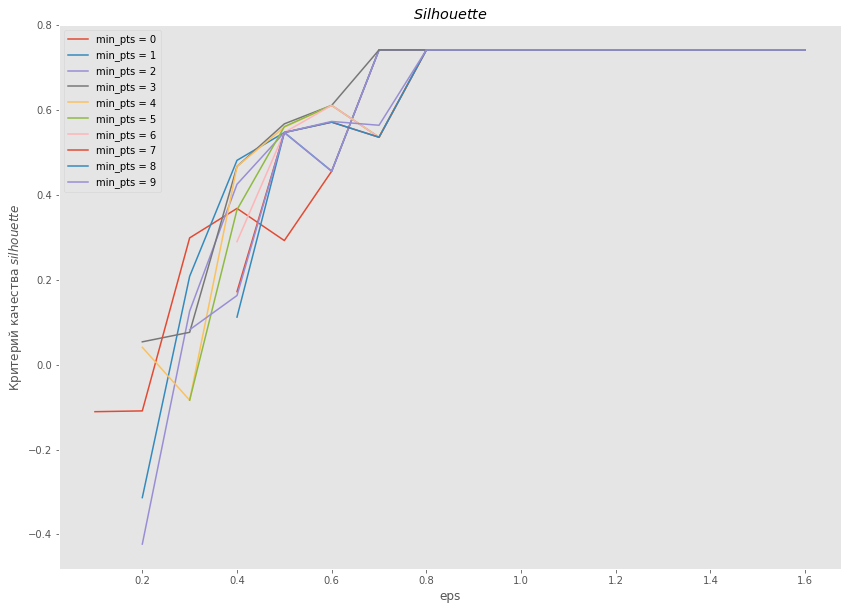

Лучшие параметры (silhouette = 0.742198079697): min_pts = 1, eps = 0.7


In [10]:
arr_min_pts = np.arange(1, 11)
arr_eps = np.linspace(0.1, 2, num=20)
x = x_iris
criteria = np.zeros((len(arr_min_pts), len(arr_eps)))


max_quality = -10
perfect_params = (0, 0)
for i, min_pts in enumerate(arr_min_pts):
    for j, eps in enumerate(arr_eps):
        cls = Clustering(min_pts=min_pts, eps=eps)
        y = cls.fit_predict(x)
        criteria[i, j] = quality(x, y)
        if max_quality < criteria[i, j]:
            max_quality = criteria[i, j]
            perfect_params = (min_pts, eps)

pl.figure(figsize=(14, 10))
for i, cur_criteria in enumerate(criteria):
    pl.plot(arr_eps, cur_criteria, label='min_pts = {}'.format(i))
pl.title('$Silhouette$')
pl.ylabel(u'Критерий качества $silhouette$')
pl.xlabel('eps')
pl.grid()
pl.legend()
pl.show()

print 'Лучшие параметры (silhouette = {}): min_pts = {}, eps = {}'\
    .format(max_quality, *perfect_params)


In [11]:
WDIdata = pd.read_csv('WDI_csv/WDIData.csv')


In [12]:
DF = WDIdata
DF = DF.loc[:, ['Country Name', 'Indicator Name', '2010']]
DF = DF.pivot(index='Country Name', columns='Indicator Name', values='2010')


In [13]:
def prepare_features(DF, n_features):
    df = DF.copy()
    features = np.random.choice(df.shape[1], size=n_features, replace=False)
    df = df.iloc[:, features]
    df = df.fillna(df.mean())
    df = df.dropna(axis=1, how='all')
    print 'Выбранные признаки:\n\t{}\n'.format('\n\t'.join(df.columns.values))
    return StandardScaler().fit_transform(df)


n_iters = 10  # количество итераций для каждого числа выбираемых признаков
for n_features in xrange(3, 6):  # перебираем количество признаков
    print u'\t\tКоличество признаков: {}\n'.format(n_features)

    for _ in xrange(n_iters):
        # Выбираем случано n_features признаков
        X = prepare_features(DF, n_features)

        arr_min_pts = np.arange(3, 10)
        arr_eps = np.linspace(0.1, 3, num=15)

        max_quality = -10
        perfect_params = (0, 0)
        # Перебираем параметры модели
        for i, min_pts in enumerate(arr_min_pts):
            for j, eps in enumerate(arr_eps):
                labels = Clustering(min_pts=min_pts, eps=eps).fit_predict(X)

                # Если кластеров мало, то считаем разбиение плохим
                if len(np.unique(labels)) <= 3:
                    continue

                cur_quality = quality(X, labels)

                # Ищем разбиение с максимальным критерием качества
                if max_quality < cur_quality:
                    max_quality = cur_quality
                    perfect_params = (min_pts, eps)

        if max_quality > 0:
            labels = Clustering(min_pts=perfect_params[0],
                                eps=perfect_params[1]).fit_predict(X)
            count_frequency = Counter(labels)
            print u'Разбиения по кластерам (количество: {}):'\
                .format(len(count_frequency))
            for k, v in count_frequency.iteritems():
                print '\t{}: {}'.format(k, v)
            print u'Лучшие параметры (silhouette = {}):'\
                ' min_pts = {}, eps = {}'.format(max_quality, *perfect_params)


		Количество признаков: 3

Выбранные признаки:
	PPG, multilateral concessional (NTR, current US$)
	Net trade in goods and services (BoP, current US$)
	Agriculture, value added per worker (constant 2010 US$)

Разбиения по кластерам (количество: 4):
	1: 219
	2: 14
	3: 3
	-1: 28
Лучшие параметры (silhouette = 0.659336452874): min_pts = 3, eps = 0.514285714286
Выбранные признаки:
	Labor force with intermediate education, male (% of male working-age population with intermediate education)
	Adjusted savings: natural resources depletion (% of GNI)
	Gross domestic savings (current LCU)

Разбиения по кластерам (количество: 4):
	1: 219
	2: 9
	3: 4
	-1: 32
Лучшие параметры (silhouette = 0.450074696255): min_pts = 4, eps = 0.514285714286
Выбранные признаки:
	Net bilateral aid flows from DAC donors, Denmark (current US$)
	PPG, bilateral (DOD, current US$)
	Adjusted net savings, including particulate emission damage (% of GNI)

Разбиения по кластерам (количество: 4):
	1: 11
	2: 227
	3: 6
	-1: 20
Луч

Разбиения по кластерам (количество: 5):
	1: 164
	2: 8
	3: 9
	4: 9
	-1: 74
Лучшие параметры (silhouette = 0.154259658674): min_pts = 4, eps = 0.514285714286
Выбранные признаки:
	Lifetime risk of maternal death (%)
	Net bilateral aid flows from DAC donors, Austria (current US$)
	Foreign direct investment, net outflows (% of GDP)
	Newborns protected against tetanus (%)
	Principal forgiven (current US$)

Разбиения по кластерам (количество: 5):
	1: 210
	2: 6
	3: 6
	4: 5
	-1: 37
Лучшие параметры (silhouette = 0.241043346034): min_pts = 3, eps = 0.721428571429
Выбранные признаки:
	Manufactures exports (% of merchandise exports)
	Inflation, GDP deflator: linked series (annual %)
	CO2 emissions from electricity and heat production, total (% of total fuel combustion)
	Household final consumption expenditure, etc. (% of GDP)
	Prevalence of severe wasting, weight for height, male (% of children under 5)

Разбиения по кластерам (количество: 5):
	1: 200
	2: 6
	3: 5
	4: 4
	-1: 49
Лучшие параметры (si

После нескольких запусков приведенного выше кода нашлось одно очень привлекательное разбиение на кластеры (в выводе выше этот вариант не сохранился):

Выбранные признаки:
* Value lost due to electrical outages (% of sales for affected firms)
* PPG, bilateral concessional (TDS, current US$)
* Household final consumption expenditure (constant LCU)

Разбиения по кластерам (количество: 4):
* 1: 90
* 2: 59
* 3: 62
* -1: 53

Лучшие параметры (silhouette = 0.574447424939): min_pts = 8, eps = 0.1

In [14]:
df = DF.copy()
features = ['Value lost due to electrical outages '
            '(% of sales for affected firms)',
            'PPG, bilateral concessional (TDS, current US$)',
            'Household final consumption expenditure (constant LCU)']
print features
df = df.loc[:, features]
df = df.fillna(df.mean())
df = df.dropna(axis=1, how='all')
print 'Выбранные признаки:\n\t{}\n'.format('\n\t'.join(df.columns.values))
X = StandardScaler().fit_transform(df)

labels = Clustering(min_pts=8, eps=0.1).fit_predict(X)
count_frequency = Counter(labels)
print u'Разбиения по кластерам (количество: {}):'.format(len(count_frequency))
for k, v in count_frequency.iteritems():
    print '\t{}: {}'.format(k, v)


['Value lost due to electrical outages (% of sales for affected firms)', 'PPG, bilateral concessional (TDS, current US$)', 'Household final consumption expenditure (constant LCU)']
Выбранные признаки:
	Value lost due to electrical outages (% of sales for affected firms)
	PPG, bilateral concessional (TDS, current US$)
	Household final consumption expenditure (constant LCU)

Разбиения по кластерам (количество: 4):
	1: 90
	2: 59
	3: 62
	-1: 53


In [15]:
for C in np.unique(labels[labels != -1]):
    print u'\tНомер кластера: {}'.format(C)
    print 'Список стран: {}\n'.format(', '.join(df.index.values[labels == C]))


	Номер кластера: 1
Список стран: Afghanistan, Albania, Algeria, Armenia, Azerbaijan, Bangladesh, Belarus, Benin, Bhutan, Bosnia and Herzegovina, Bulgaria, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Central African Republic, Chad, Comoros, Congo, Rep., Cote d'Ivoire, Djibouti, Ecuador, Eritrea, Ethiopia, Fiji, Gabon, Gambia, The, Georgia, Ghana, Guinea, Guinea-Bissau, Haiti, Jordan, Kazakhstan, Kenya, Kosovo, Kyrgyz Republic, Lao PDR, Lebanon, Lesotho, Liberia, Low income, Macedonia, FYR, Madagascar, Malawi, Malaysia, Maldives, Mali, Mauritania, Mauritius, Moldova, Mongolia, Montenegro, Mozambique, Myanmar, Nepal, Niger, Nigeria, Pakistan, Papua New Guinea, Romania, Russian Federation, Rwanda, Samoa, Sao Tome and Principe, Senegal, Serbia, Sierra Leone, Solomon Islands, Somalia, South Africa, Sri Lanka, Sudan, Swaziland, Syrian Arab Republic, Tajikistan, Tanzania, Thailand, Togo, Tonga, Tunisia, Turkey, Turkmenistan, Uganda, Ukraine, Uzbekistan, Vanuatu, Zambia, Zimbabwe

	Н

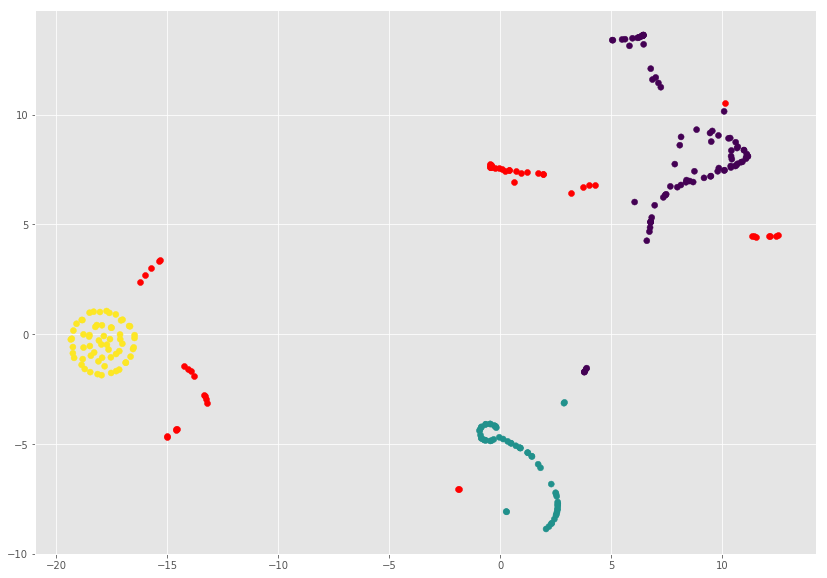

In [16]:
transformed_data = TSNE(n_components=2).fit_transform(X)
pl.figure(figsize=(14, 10))
pl.scatter(transformed_data[:, 0][labels != -1],
           transformed_data[:, 1][labels != -1], c=labels[labels != -1])
pl.scatter(transformed_data[:, 0][labels == -1],
           transformed_data[:, 1][labels == -1], c='r')
pl.show()


Красные точки – это объекты, которые были приняты за шум

### Задание 4
Когда я учитывал все признаки, то критерий качества silhouette получался отрицательным. Тогда я начал случайным образом выбирать малое количество признаков, по которым производилась кластеризация. При таком подходе однажды разбиение по кластерам оказалось очень удачным.

Все три признака описывают финансовое состояние страны, поэтому разбиение стран на кластеры получилось следующим:
* в кластер №1 вошли бедные страны
* в кластер №2 вошли богатые страны
* третий кластер выглядит странно.

Возможно, разбиение соответствует следующему положению вещей:
* 1 кластер - страны которым должны
* 2 кластер - страны, которые должны
* 3 кластер - остальные страны

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.